## Environment Setting

In [2]:
import pandas as pd #data handlig
import random

#preprocessing data
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import replacers #making-program "replacers.py"

from string import punctuation
from collections import Counter
from operator import itemgetter

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

## Load Data Set

In [3]:
df = pd.read_csv('./data/Amazon_review.csv', encoding='949')
print(df.shape)
df.head()

(23210, 5)


,Unnamed: 0,stars,title,date,text
0,1,5.0 out of 5 stars,Sound quality has been improved again! 3rd ti...,"on November 2, 2017",So it’s been an interesting first few weeks wi...
1,2,4.0 out of 5 stars,Audio is IMPROVED after software update! See ...,"on November 2, 2017",---------------------------UPDATE 11/4/2017---...
2,3,5.0 out of 5 stars,Audio Now Sounds Great after Software Update -...,"on November 2, 2017",Update: Amazon has pushed a software update an...
3,4,5.0 out of 5 stars,WoW,"on November 23, 2017","I love my Echo, it's stylish, loud<f0><U+009F>..."
4,5,3.0 out of 5 stars,Hoped to replace our small bluetooth speakers....,"on November 5, 2017",Sound is not great. A review of the Echo as a ...


## Pre-processing

Drop the first column(index)

In [4]:
df = df.drop(df.columns[0], axis=1)
print(df.shape)
df.head()

(23210, 4)


,stars,title,date,text
0,5.0 out of 5 stars,Sound quality has been improved again! 3rd ti...,"on November 2, 2017",So it’s been an interesting first few weeks wi...
1,4.0 out of 5 stars,Audio is IMPROVED after software update! See ...,"on November 2, 2017",---------------------------UPDATE 11/4/2017---...
2,5.0 out of 5 stars,Audio Now Sounds Great after Software Update -...,"on November 2, 2017",Update: Amazon has pushed a software update an...
3,5.0 out of 5 stars,WoW,"on November 23, 2017","I love my Echo, it's stylish, loud<f0><U+009F>..."
4,3.0 out of 5 stars,Hoped to replace our small bluetooth speakers....,"on November 5, 2017",Sound is not great. A review of the Echo as a ...


Decomposition from dataframe to list

In [5]:
titleList = df['title'].values.tolist()
dateList = df['date'].values.tolist()
reviewList = df['text'].values.tolist()

_Pre-processing for dates type_

In [6]:
yearList = []
monthList = []
dayList = []
for date in dateList:
    temp1 = date.replace('on ', '')
    temp2 = temp1.replace(',', '')
    temp3 = temp2.split()
    yearList.append(temp3[2])
    monthList.append(temp3[0])
    dayList.append(temp3[1])
    
print(len(yearList))
print(len(monthList))
print(len(dayList))

23210
23210
23210


In [7]:
months =[month[:3] for month in monthList]
print(len(months))

23210


_Pre-processing for Title_

> Lower Case

In [7]:
lower_title = [str(line).lower() for line in titleList]
print(len(lower_title))
#print(lower_title)

23210


> Alternative words(I'am -> i am)

In [8]:
replacer = replacers.RegexpReplacer()

In [9]:
decomp_words_title = [replacer.replace(line) for line in lower_title]
print(len(decomp_words_title))

23210


> Tokenization

In [10]:
def tokenize(list_type):
    
    t = RegexpTokenizer("[\w]+")
    tokenized_list = []

    for word in list_type:
        tokens = t.tokenize(word)
        tokenized_list = tokenized_list + tokens
    
    return tokenized_list

In [11]:
token = tokenize(decomp_words_title)
print(len(token))

111398


> Stop words(default)

In [12]:
stops = stopwords.words('english')

In [13]:
tokens = [word for word in token if word not in stops]
print(len(tokens))

69254


In [14]:
postagToken = nltk.pos_tag(tokens)

In [15]:
tagList = []
for i in range(len(postagToken)):
    if postagToken[i][1].startswith('N'):
        tagList.extend('n')
    elif postagToken[i][1].startswith('V'):
        tagList.extend('v')
    elif postagToken[i][1].startswith('J'):
        tagList.extend('a')
    elif postagToken[i][1].startswith('R'):
        tagList.extend('r')
    else:
        tagList.extend('q')

> Lemmatization

In [16]:
wl = WordNetLemmatizer()

In [17]:
lemmatized_token = []
for ord in range(len(tokens)):
    if tagList[ord] != 'q' :
        temp = wl.lemmatize(tokens[ord], pos=tagList[ord])
    else:
        temp = wl.lemmatize(tokens[ord])
    lemmatized_token.append(temp)

In [18]:
lemmatized_token

['sound',
 'quality',
 'improve',
 '3rd',
 'time',
 'charm',
 'audio',
 'improve',
 'software',
 'update',
 'see',
 'check',
 'audio',
 'sound',
 'great',
 'software',
 'update',
 'read',
 'review',
 'detail',
 'wow',
 'hop',
 'replace',
 'small',
 'bluetooth',
 'speaker',
 'much',
 'excellent',
 'alexa',
 'product',
 'lifesaver',
 '84',
 'year',
 'old',
 'mother',
 'make',
 'phone',
 'call',
 'fix',
 'sound',
 'plus',
 'gripe',
 'disappoint',
 'underwhelmed',
 'issue',
 'sound',
 'design',
 'early',
 'review',
 'mislead',
 '6',
 'grow',
 'harem',
 'alexas',
 'lose',
 'connection',
 'spotify',
 'connect',
 'day',
 'reset',
 'unplug',
 'plug',
 'back',
 'look',
 'great',
 'sound',
 'improve',
 'since',
 'initial',
 'release',
 'date',
 'read',
 'review',
 'folk',
 'happy',
 'sound',
 'quality',
 'speaker',
 'music',
 '2nd',
 'echo',
 '1st',
 'gen',
 'v',
 '2nd',
 'gen',
 'good',
 'device',
 'would',
 'great',
 'could',
 'play',
 'sound',
 'echo',
 'bluetooth',
 'speaker',
 'time',
 'dis

> Making a corpus

In [19]:
word_counts = Counter(lemmatized_token)

In [20]:
word_counts.most_common(20)

[('star', 9737),
 ('five', 7761),
 ('love', 2322),
 ('great', 2156),
 ('sound', 1979),
 ('echo', 1488),
 ('alexa', 1200),
 ('four', 1063),
 ('good', 963),
 ('music', 871),
 ('like', 842),
 ('use', 674),
 ('fun', 648),
 ('one', 647),
 ('work', 566),
 ('product', 564),
 ('quality', 562),
 ('easy', 559),
 ('get', 509),
 ('well', 496)]

cf. Chart for "frequency of words"

In [21]:
corpus = nltk.Text(lemmatized_token)

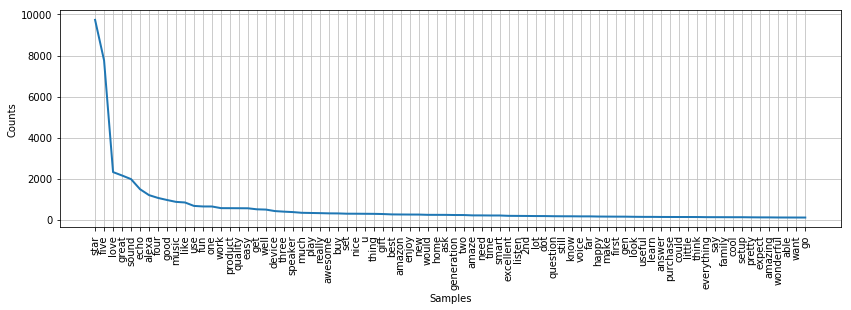

In [22]:
plt.figure(figsize=(14,4))
corpus.plot(80)

_Pre-processing for review_

> Lower Case

In [23]:
lower_review = [str(line).lower() for line in reviewList]
print(len(lower_review))

23210


> Alternative words(I'am -> i am)

In [24]:
decomp_words_review = [replacer.replace(line) for line in lower_review]
print(len(decomp_words_review))

23210


In [25]:
decomp_words_review

['so it is been an interesting first few weeks with the echo and am happy to say echo 2nd gen has finally delivered on its promise of improved sound quality over 1st gen echo, with the 3rd firmware since launch.  if you are confused about a lot of the negative reviews, old firmware is the likely cause of most of them regarding poor sound quality.want to keep this short and spare all the gory details, but there was a bug in the launch version of the firmware, which was fixed after a few days, but the first fix, while satisfying some, was not, in my opinion a full fix and left the mid-range frequencies muted and tinny.  today i noticed that alexa is voice in this unit sounded much more like alexa is voice on gen 1 echo is i own and, after playing some music, suspected they had upgraded the firmware again, and indeed they have.  the current firmware is 592452720 and it is a massive improvement over both the original and updated version 592452420.so i decided to do some more side-by-side c

> Tokenization

In [26]:
tokenReview = tokenize(decomp_words_review)
print(len(tokenReview))

681016


> Stop words(default)

In [27]:
tokens = [word for word in tokenReview if word not in stops]
print(len(tokens))

336456


In [28]:
postagToken = nltk.pos_tag(tokenReview)

In [29]:
tagList = []
for i in range(len(postagToken)):
    if postagToken[i][1].startswith('N'):
        tagList.extend('n')
    elif postagToken[i][1].startswith('V'):
        tagList.extend('v')
    elif postagToken[i][1].startswith('J'):
        tagList.extend('a')
    elif postagToken[i][1].startswith('R'):
        tagList.extend('r')
    else:
        tagList.extend('q')

> Lemmatization

In [30]:
lemmatized_token_review = []
for ord in range(len(tokens)):
    if tagList[ord] != 'q' :
        temp = wl.lemmatize(tokens[ord], pos=tagList[ord])
    else:
        temp = wl.lemmatize(tokens[ord])
    lemmatized_token_review.append(temp)

In [31]:
lemmatized_token_review

['interesting',
 'first',
 'weeks',
 'echo',
 'happy',
 'say',
 'echo',
 '2nd',
 'gen',
 'finally',
 'delivered',
 'promise',
 'improved',
 'sound',
 'quality',
 '1st',
 'gen',
 'echo',
 '3rd',
 'firmware',
 'since',
 'launch',
 'confuse',
 'lot',
 'negative',
 'review',
 'old',
 'firmware',
 'likely',
 'cause',
 'regarding',
 'poor',
 'sound',
 'quality',
 'want',
 'keep',
 'short',
 'spare',
 'gory',
 'detail',
 'bug',
 'launch',
 'version',
 'firmware',
 'fixed',
 'day',
 'first',
 'fix',
 'satisfying',
 'opinion',
 'full',
 'fix',
 'left',
 'mid',
 'range',
 'frequencies',
 'muted',
 'tinny',
 'today',
 'noticed',
 'alexa',
 'voice',
 'unit',
 'sounded',
 'much',
 'like',
 'alexa',
 'voice',
 'gen',
 '1',
 'echo',
 'playing',
 'music',
 'suspected',
 'upgraded',
 'firmware',
 'indeed',
 'current',
 'firmware',
 '592452720',
 'massive',
 'improvement',
 'original',
 'updated',
 'version',
 '592452420',
 'decided',
 'side',
 'side',
 'comparisons',
 'gen',
 '1',
 'echo',
 'honestly',

> Making a corpus

In [32]:
word_counts_review = Counter(lemmatized_token_review)

In [33]:
word_counts_review.most_common(20)

[('love', 8373),
 ('echo', 8007),
 ('sound', 7665),
 ('music', 6038),
 ('alexa', 5913),
 ('great', 5797),
 ('like', 3608),
 ('use', 3469),
 ('good', 2832),
 ('one', 2732),
 ('get', 2553),
 ('amazon', 2500),
 ('play', 2447),
 ('work', 2354),
 ('quality', 2323),
 ('would', 2174),
 ('device', 2059),
 ('time', 2055),
 ('much', 1974),
 ('speaker', 1965)]

cf. Chart for "frequency of words"

In [34]:
corpusReview = nltk.Text(lemmatized_token_review)

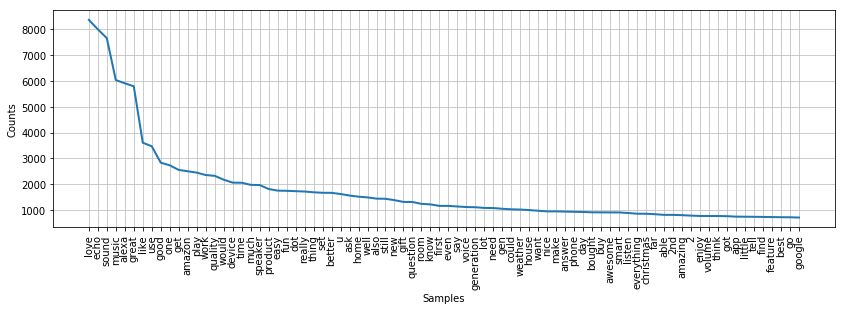

In [35]:
plt.figure(figsize=(14,4))
corpusReview.plot(80)

---------------------------------------------------------------------------------------

In [36]:
review_corpus = list(word_counts_review.items())
review_corpus

[('interesting', 72),
 ('first', 1157),
 ('weeks', 48),
 ('echo', 8007),
 ('happy', 594),
 ('say', 1134),
 ('2nd', 808),
 ('gen', 1045),
 ('finally', 139),
 ('delivered', 29),
 ('promise', 23),
 ('improved', 314),
 ('sound', 7665),
 ('quality', 2323),
 ('1st', 494),
 ('3rd', 44),
 ('firmware', 108),
 ('since', 411),
 ('launch', 14),
 ('confuse', 17),
 ('lot', 1078),
 ('negative', 93),
 ('review', 388),
 ('old', 390),
 ('likely', 44),
 ('cause', 49),
 ('regarding', 17),
 ('poor', 120),
 ('want', 968),
 ('keep', 460),
 ('short', 84),
 ('spare', 7),
 ('gory', 1),
 ('detail', 26),
 ('bug', 43),
 ('version', 263),
 ('fixed', 49),
 ('day', 921),
 ('fix', 133),
 ('satisfying', 3),
 ('opinion', 69),
 ('full', 241),
 ('left', 32),
 ('mid', 46),
 ('range', 125),
 ('frequencies', 1),
 ('muted', 7),
 ('tinny', 44),
 ('today', 114),
 ('noticed', 50),
 ('alexa', 5913),
 ('voice', 1112),
 ('unit', 469),
 ('sounded', 67),
 ('much', 1974),
 ('like', 3608),
 ('1', 489),
 ('playing', 701),
 ('music', 603

In [37]:
#new_review = sorted(review_corpus, key=itemgetter(1), reverse=True)[400:-1800]
#new_review

In [38]:
export_list = []
for word in review_corpus:
    if len(word) != 1:
        export_list.append(word[0])

In [39]:
export_list

['interesting',
 'first',
 'weeks',
 'echo',
 'happy',
 'say',
 '2nd',
 'gen',
 'finally',
 'delivered',
 'promise',
 'improved',
 'sound',
 'quality',
 '1st',
 '3rd',
 'firmware',
 'since',
 'launch',
 'confuse',
 'lot',
 'negative',
 'review',
 'old',
 'likely',
 'cause',
 'regarding',
 'poor',
 'want',
 'keep',
 'short',
 'spare',
 'gory',
 'detail',
 'bug',
 'version',
 'fixed',
 'day',
 'fix',
 'satisfying',
 'opinion',
 'full',
 'left',
 'mid',
 'range',
 'frequencies',
 'muted',
 'tinny',
 'today',
 'noticed',
 'alexa',
 'voice',
 'unit',
 'sounded',
 'much',
 'like',
 '1',
 'playing',
 'music',
 'suspected',
 'upgraded',
 'indeed',
 'current',
 '592452720',
 'massive',
 'improvement',
 'original',
 'updated',
 '592452420',
 'decided',
 'side',
 'comparisons',
 'honestly',
 'many',
 'area',
 'actually',
 'better',
 'product',
 'complaint',
 'point',
 'low',
 'frequency',
 'loudness',
 'could',
 'stand',
 'bumped',
 'tad',
 'yet',
 'please',
 'add',
 'eq',
 'feature',
 'app',
 'u

In [40]:
sampling_export_list = random.sample(lemmatized_token_review, 15000)
print(len(sampling_export_list))

15000


In [41]:
cut_reviews = {
    'review':sampling_export_list
}
ex_review_v2 = pd.DataFrame.from_dict(cut_reviews)

In [42]:
ex_review_v2.to_csv('./data/pre_review3.csv')

-----------------------------

In [43]:
making_title = {
    'title': lemmatized_token
}

In [44]:
making_review = {
    'reveiw': lemmatized_token_review
}

In [45]:
ex_title = pd.DataFrame.from_dict(making_title)
ex_review = pd.DataFrame.from_dict(making_review)

In [46]:
ex_title.to_csv('./data/pre_title.csv')
ex_review.to_csv('./data/pre_review.csv')

------------------------------

In [9]:
total_reviews = [review for review in reviewList]
print(len(total_reviews))

23210


In [11]:
sampling_export_review_list = random.sample(total_reviews, 1000)

In [13]:
sample1000_reviews = {
    'review':sampling_export_review_list
}
ex_review_v3 = pd.DataFrame.from_dict(sample1000_reviews)

In [14]:
ex_review_v3.to_csv('./data/pre_review1000.csv')